In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from fancyimpute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
import numpy as np

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/anishgoel/Dating_preference_matching/data/speed_data_data.csv')  # Adjust the path and encoding if necessary

# Display the first few rows of the dataframe
print(data.head())

print(data.isnull().sum())

   gender   age   income  goal  career  dec  attr  sinc  intel  fun  amb  \
0       0  21.0  69487.0   2.0  lawyer    1   6.0   9.0    7.0  7.0  6.0   
1       0  21.0  69487.0   2.0  lawyer    1   7.0   8.0    7.0  8.0  5.0   
2       0  21.0  69487.0   2.0  lawyer    1   5.0   8.0    9.0  8.0  5.0   
3       0  21.0  69487.0   2.0  lawyer    1   7.0   6.0    8.0  7.0  6.0   
4       0  21.0  69487.0   2.0  lawyer    1   5.0   6.0    7.0  7.0  6.0   

   shar  like  prob  met  
0   5.0   7.0   6.0  2.0  
1   6.0   7.0   5.0  1.0  
2   7.0   7.0   NaN  1.0  
3   8.0   7.0   6.0  2.0  
4   6.0   6.0   6.0  2.0  
gender       0
age         95
income    4099
goal        79
career      89
dec          0
attr       202
sinc       277
intel      296
fun        350
amb        712
shar      1067
like       240
prob       309
met        375
dtype: int64


In [3]:
data.shape

(8378, 15)

In [4]:
missing_income_percentage = data['income'].isnull().sum() / len(data) * 100
print(f"Percentage of missing values in the 'income' column: {missing_income_percentage:.2f}%")

Percentage of missing values in the 'income' column: 48.93%


In [5]:
#Filling in missing values for age with median

median_age = data['age'].median()
data['age'].fillna(median_age, inplace = True)


In [6]:
#Filling in misssing values for goals with mode

goal_mode = data['goal'].mode()[0]
data['goal'].fillna(goal_mode, inplace = True)

In [7]:
#Filling in misssing values for career with mode

career_mode = data['career'].mode()[0]
data['career'].fillna(career_mode, inplace = True)

In [8]:
data.isnull().sum()

gender       0
age          0
income    4099
goal         0
career       0
dec          0
attr       202
sinc       277
intel      296
fun        350
amb        712
shar      1067
like       240
prob       309
met        375
dtype: int64

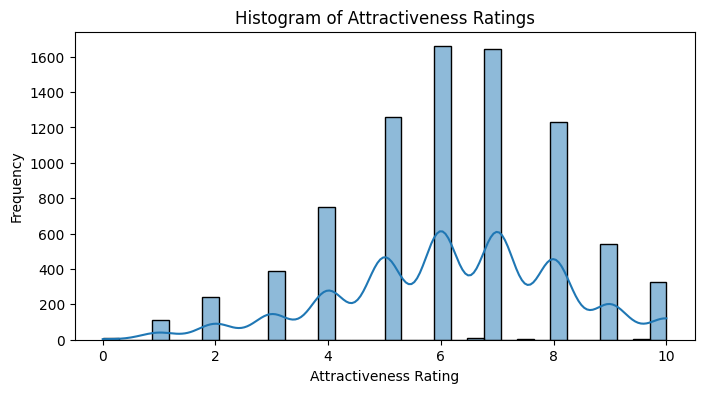

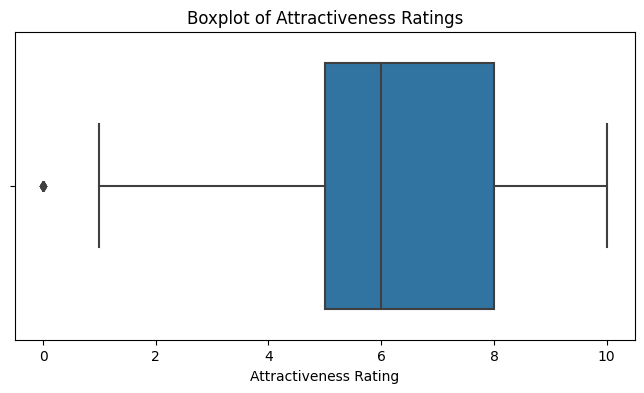

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of 'attr'
plt.figure(figsize=(8, 4))
sns.histplot(data['attr'], kde=True)
plt.title('Histogram of Attractiveness Ratings')
plt.xlabel('Attractiveness Rating')
plt.ylabel('Frequency')
plt.show()

# Boxplot to view outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['attr'])
plt.title('Boxplot of Attractiveness Ratings')
plt.xlabel('Attractiveness Rating')
plt.show()

In [10]:
attr_median = data['attr'].median()
data['attr'].fillna(attr_median, inplace = True)

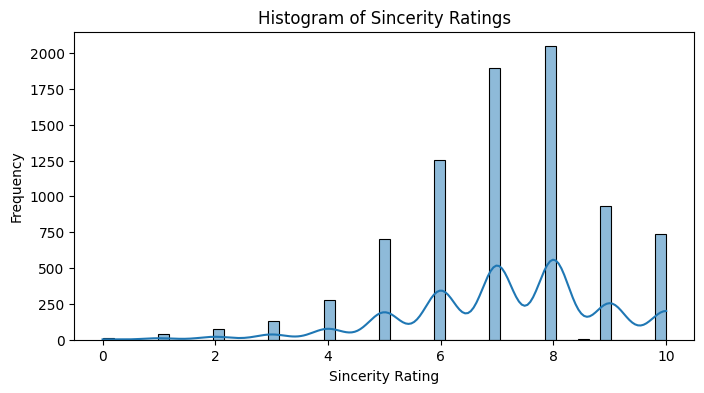

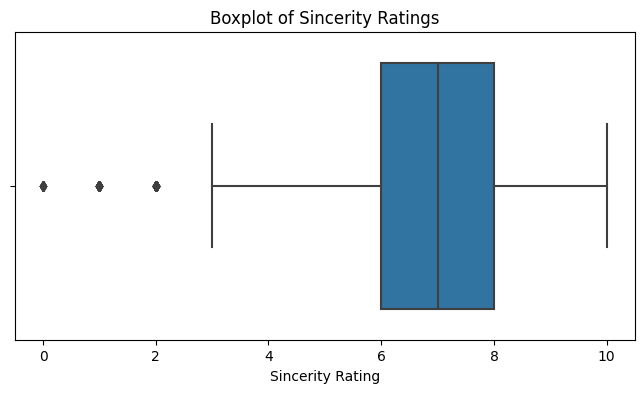

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of 'attr'
plt.figure(figsize=(8, 4))
sns.histplot(data['sinc'], kde=True)
plt.title('Histogram of Sincerity Ratings')
plt.xlabel('Sincerity Rating')
plt.ylabel('Frequency')
plt.show()

# Boxplot to view outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['sinc'])
plt.title('Boxplot of Sincerity Ratings')
plt.xlabel('Sincerity Rating')
plt.show()

In [12]:
median_sinc = data['sinc'].median()
data['sinc'].fillna(median_sinc, inplace = True)

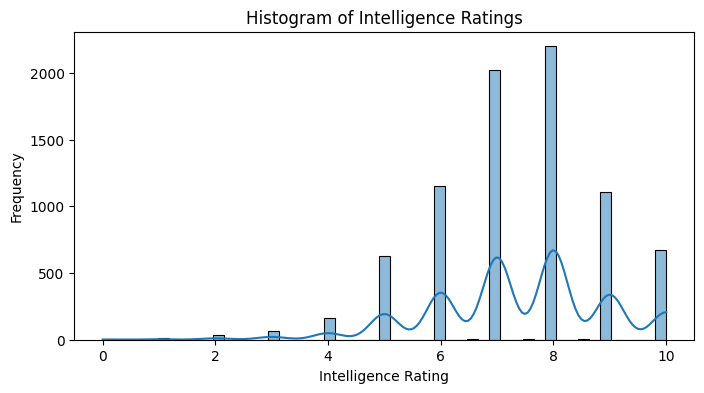

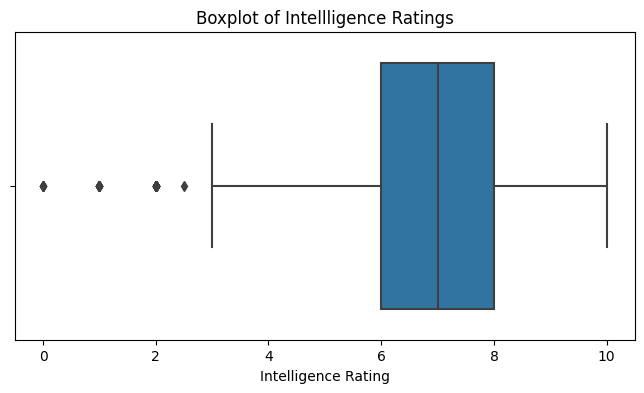

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of 'attr'
plt.figure(figsize=(8, 4))
sns.histplot(data['intel'], kde=True)
plt.title('Histogram of Intelligence Ratings')
plt.xlabel('Intelligence Rating')
plt.ylabel('Frequency')
plt.show()

# Boxplot to view outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['intel'])
plt.title('Boxplot of Intellligence Ratings')
plt.xlabel('Intelligence Rating')
plt.show()

In [14]:
median_intel = data['intel'].median()
data['intel'].fillna(median_intel, inplace = True)

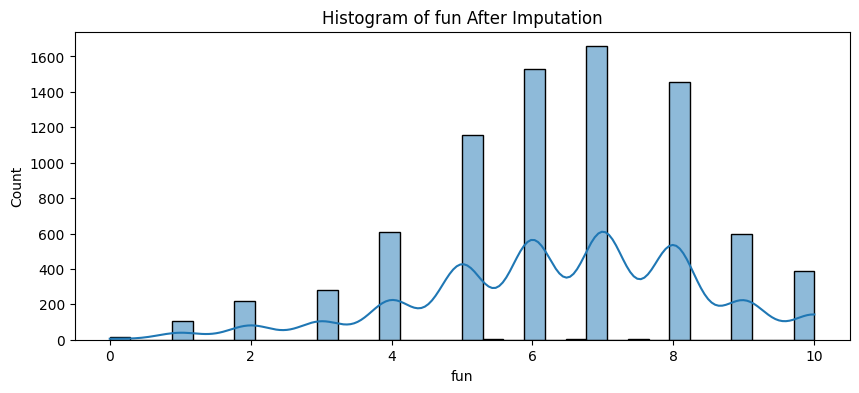

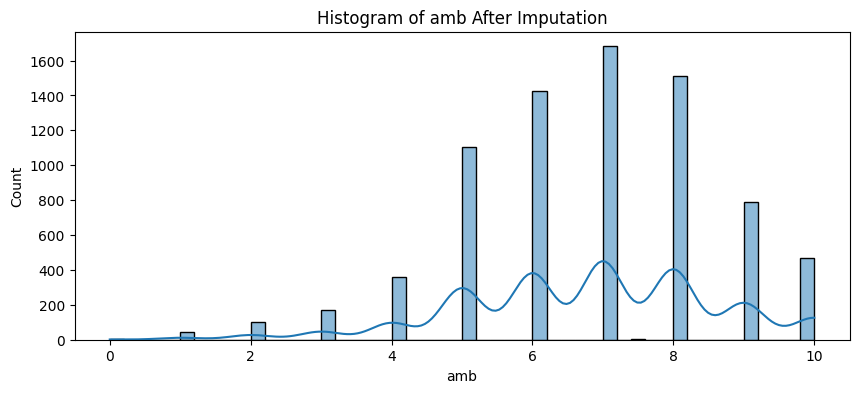

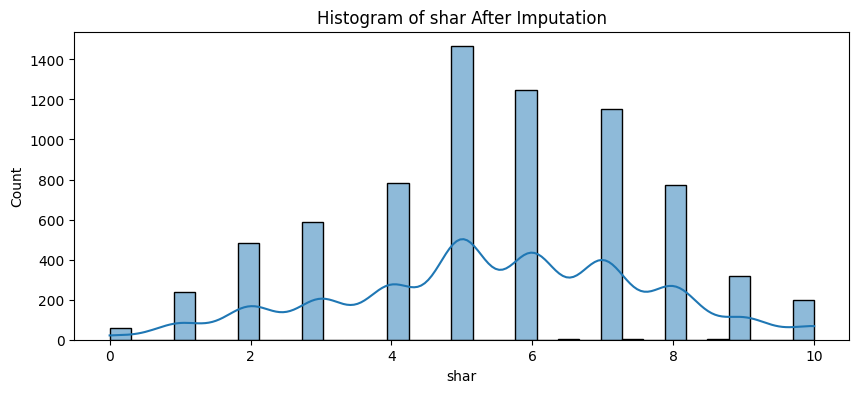

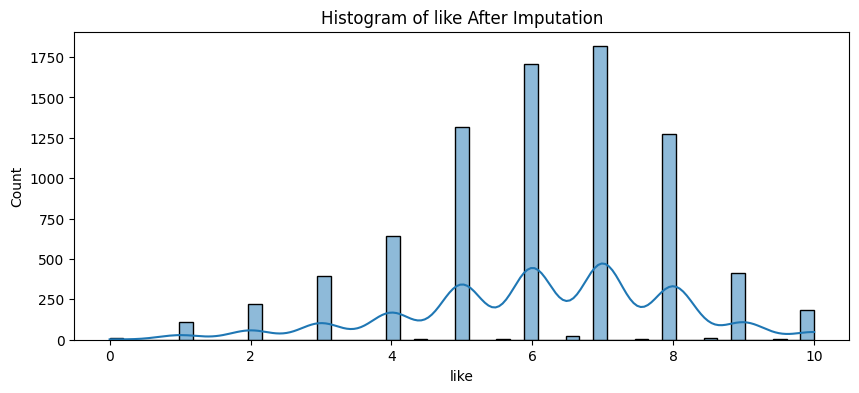

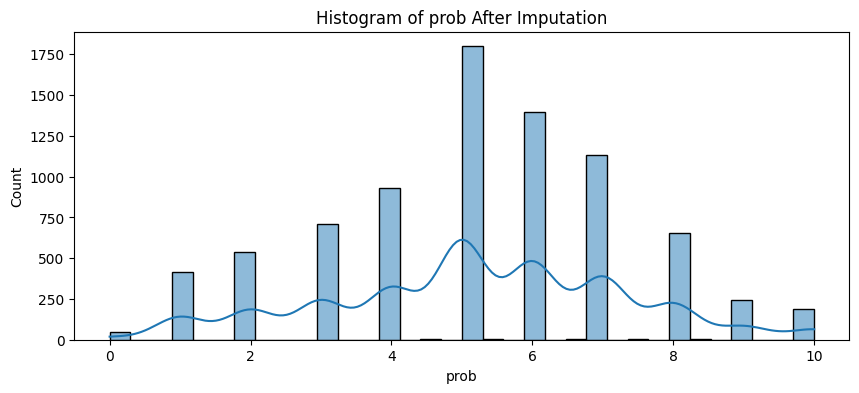

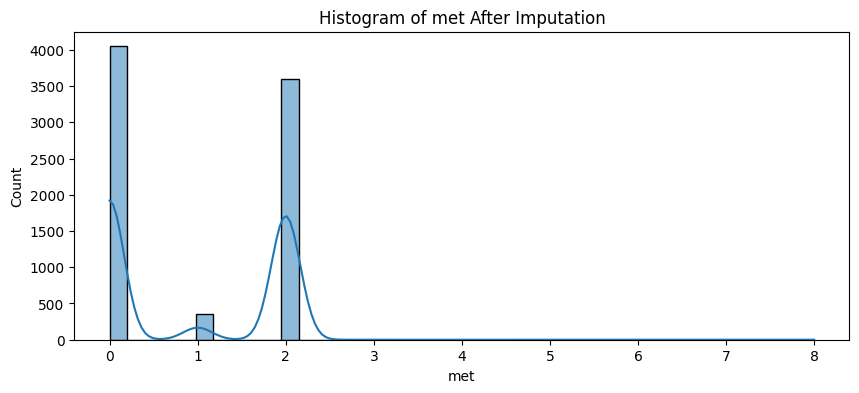

In [15]:
columns_to_impute = ['fun', 'amb', 'shar', 'like', 'prob', 'met']
for column in columns_to_impute:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column} After Imputation')
    plt.show()

In [16]:
for col in columns_to_impute[:len(columns_to_impute)-1]:
    median = data[col].median()
    data[col].fillna(median, inplace=True)

In [17]:
met_mode = data['met'].mode()[0]
data['met'].fillna(met_mode, inplace = True)

In [18]:
total_rows = data.shape[0]
missing_income = data['income'].isnull().sum()
missing_percentage = (missing_income / total_rows) * 100

print(f"Total rows: {total_rows}")
print(f"Missing income data: {missing_income}")
print(f"Percentage of missing 'income' data: {missing_percentage:.2f}%")

Total rows: 8378
Missing income data: 4099
Percentage of missing 'income' data: 48.93%


In [27]:

encoder = LabelEncoder()
categorical_columns = ['gender', 'goal', 'career', 'dec', 'met']  # Update this list based on your data understanding

for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column].astype(str))

# Prepare numeric columns for MICE
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Initialize MICE imputer
mice_imputer = IterativeImputer()

# Fit the imputer and transform the data
imputed_data = mice_imputer.fit_transform(data[numeric_columns])

# Convert the imputed data back to a DataFrame and assign back to the original DataFrame
imputed_data_df = pd.DataFrame(imputed_data, columns=numeric_columns)
data[numeric_columns] = imputed_data_df[numeric_columns]

# Verify no more missing values
print(data.isnull().sum())

gender    0
age       0
income    0
goal      0
career    0
dec       0
attr      0
sinc      0
intel     0
fun       0
amb       0
shar      0
like      0
prob      0
met       0
dtype: int64


Index(['gender', 'age', 'income', 'goal', 'career', 'dec', 'attr', 'sinc',
       'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met'],
      dtype='object')